# Data Importing

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data_credit = pd.read_csv("Credit.csv")

# Description of Variables
- Balance: Average Credit Card Debt
- Age
- Cards: Number of credit cards 
- Education: Years of education 
- Income (in thousands of dollars) 
- Limit: Credit Limit
- Rating: Credit Rating 
- Gender
- Student
- Married
- Ethnicity: Asian, African American, Caucasian"

## Exploratory Data Analysis

In [6]:
data_credit.dtypes

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object

In [13]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [9]:
data_credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


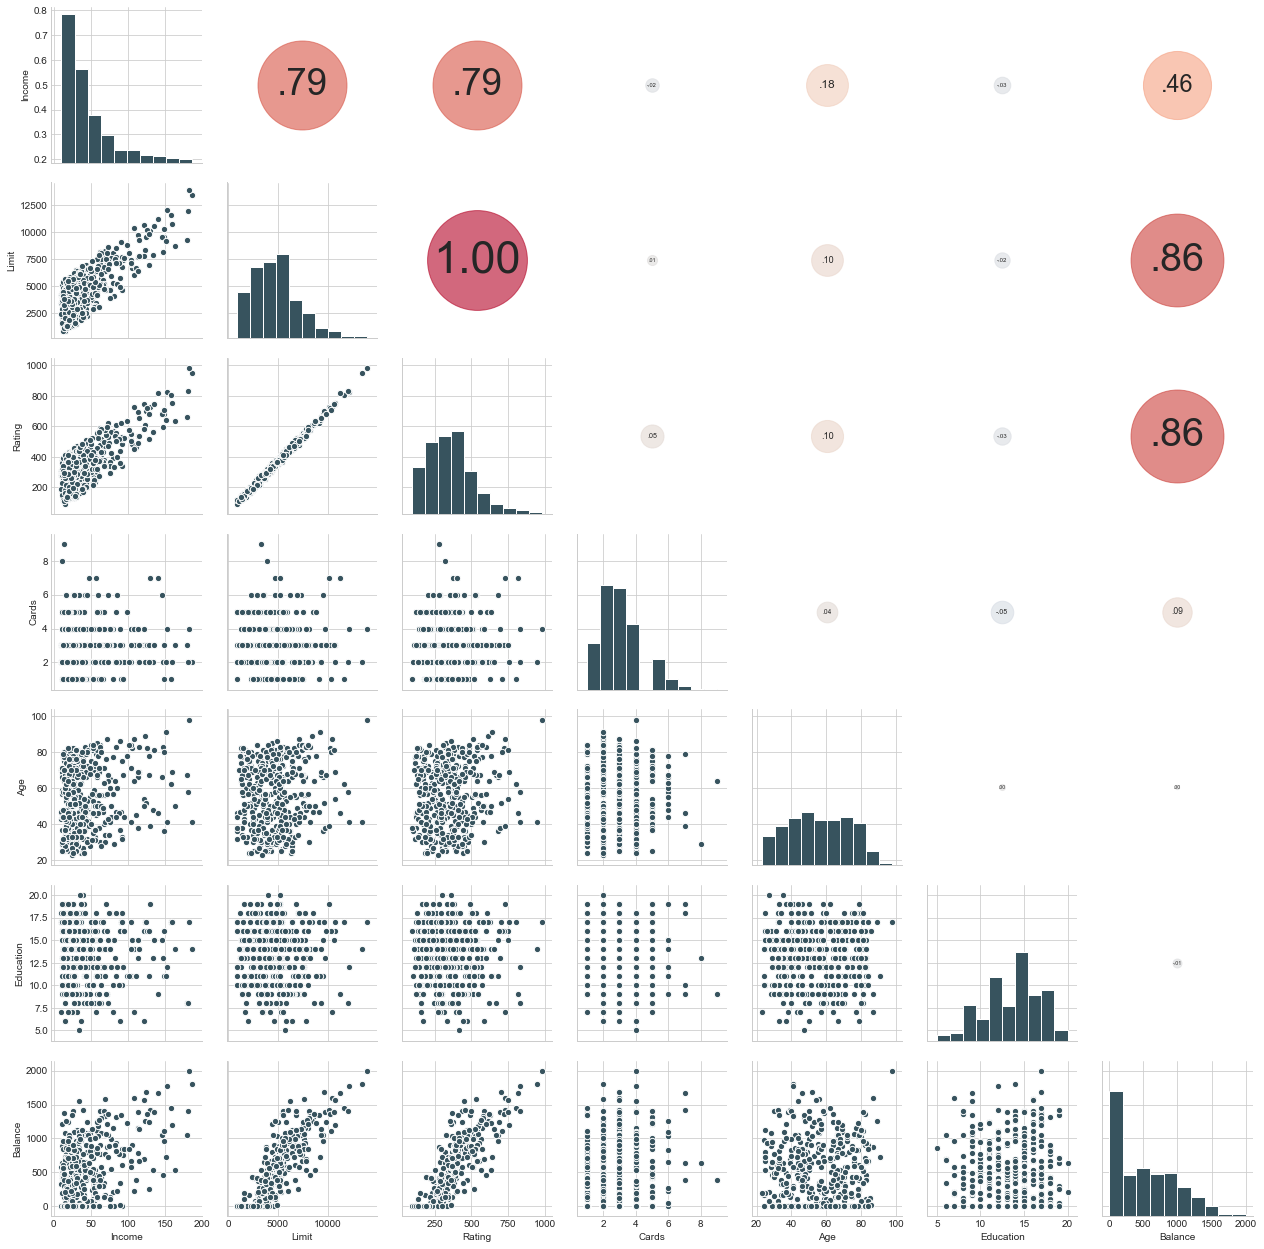

In [37]:
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")

#DV Scatter Plots
g = sns.PairGrid(data_credit.iloc[:,1:])
g = g.map_diag(plt.hist,edgecolor="w")
g = g.map_lower(plt.scatter,edgecolor="w",s=40)

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
g.map_upper(corrdot)

In [ ]:
#DV Scatter Plots - Inference

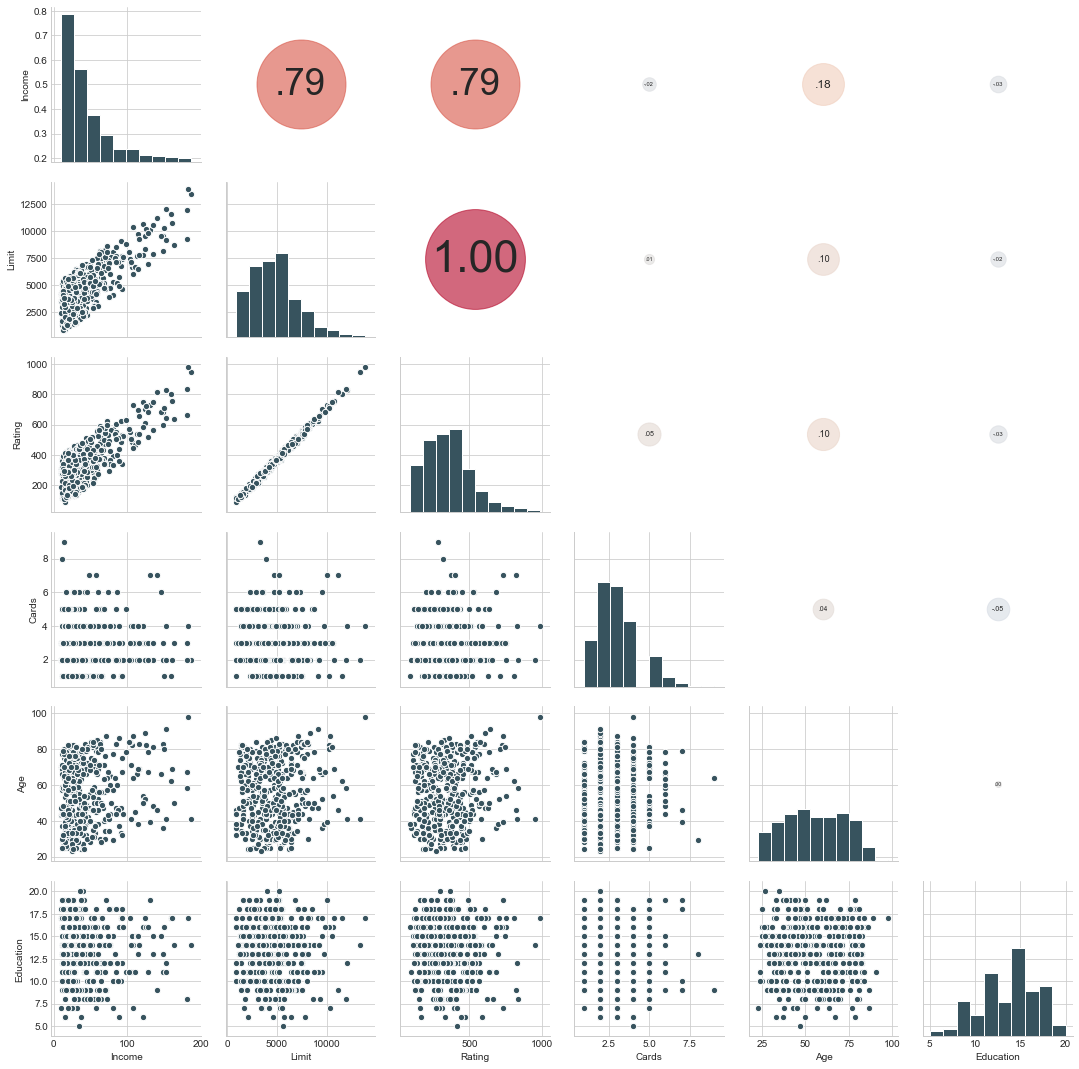

In [43]:
#IV Scatter Plots
g = sns.PairGrid(data_credit.iloc[:,1:10])
g = g.map_diag(plt.hist,edgecolor="w")
g = g.map_lower(plt.scatter,edgecolor="w",s=40)

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter(.5, .5, marker_size, corr_r, alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
g.map_upper(corrdot)

#### IV Scatterplots - Inference
http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

## Data Preprocessing

In [16]:
# Encoding
data_credit_encoded = data_credit.copy()
data_credit_encoded = pd.get_dummies(data_credit_encoded,columns =['Gender','Student','Married','Ethnicity'],drop_first='true')
data_credit_encoded.head()
#Reference levels for the categorical variables are - Gender_Male,Student_No,Married_No,Ethnicity_African American''''''

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,4,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,331,0,0,1,0,1


# Model Building

#### Training & Test Data Split

In [77]:
y = data_credit_encoded['Balance']
X = pd.concat([data_credit_encoded.iloc[:,1:7],data_credit_encoded.iloc[:,8:]],axis=1)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,0,0,1,0,1
1,106.025,6645,483,3,82,15,1,1,1,1,0
2,104.593,7075,514,4,71,11,0,0,0,1,0
3,148.924,9504,681,3,36,11,1,0,0,1,0
4,55.882,4897,357,2,68,16,0,0,1,0,1


#### Fitting the Model on training data

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

#Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# Print intercept
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [-7.90145959e+00  1.86785264e-01  1.24670814e+00  1.47986658e+01
 -6.86965108e-01  3.00904080e-01 -1.73980199e+00  4.24096645e+02
 -1.20871166e+01  2.43504552e+01  1.91909885e+01]
Intercept: 
 -511.28049136710433


#### Predicting on training data using the fitted model

Text(0,0.5,'Predicted Y on traning set')

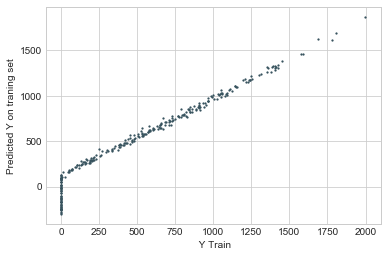

In [59]:
predictions_train = lm.predict(X_train)

#Create a scatterplot of the real train values versus the predicted values on training data
plt.scatter(y_train,predictions_train, s = 1.5)
plt.xlabel(' Y Train')
plt.ylabel('Predicted Y on traning set')

##### Predicitng on test data usinf fitted model

Text(0,0.5,'Predicted Y on test set')

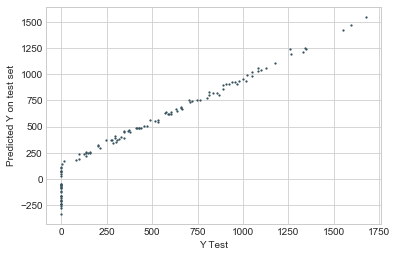

In [61]:
predictions_test = lm.predict( X_test)

#Create a scatterplot of the real test values versus the predicted values on test data
plt.scatter(y_test,predictions_test, s=1.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y on test set')

# Model Evalutaion

#### Train and Test Metrics

In [71]:
import sklearn
from sklearn import metrics
#Train Metrics
print('Train metrics:\n')
print('Train_MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('Train_MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('Train_RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Train_R Squared:', sklearn.metrics.r2_score(y_train,predictions_train))
print('\n')
#Test Metrics
print('Test metrics:\n')
print('Test_MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('Test_MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('Test_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))
print('Test_R Squared: ', sklearn.metrics.r2_score(y_test,predictions_test))

Train metrics:

Train_MAE: 74.41272266609023
Train_MSE: 9076.87565399123
Train_RMSE: 95.27263853799384
Train_R Squared: 0.9583397889776345


Test metrics:

Test_MAE: 82.02721804780477
Test_MSE: 10698.54591588464
Test_RMSE: 103.43377550821899
Test_R Squared:  0.9441620524057878


##### Metrics - Inference
The difference between Train and Test MSE/R Square is not significantly high and hence we can assume the model to be doing good.

#### Residual Analysis - Check for Homoscedasticity & Non-Linear relationship